<a href="https://colab.research.google.com/github/JuanM-GG/modelos-tesis/blob/main/algoritmos_geneticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Algortimos genéticos

Nombre: Juan Manuel 

Fecha: 

Los algoritmos genéticos (AGs) fueron inventados por John Holland en la universidad de Michigan en 1970s (2016—ESSENTIALS). Los algoritmos genéticos están basados en los principios de la selección natural. Los elementos básicos de la selección natural – reproducción, cruzamiento y mutación – son usados en el procedimiento (2009—modern methods). Específicamente, los AG simulan los procesos biológicos que permiten a las consecutivas generaciones en una especie adaptarse a su ambiente. El proceso de adaptación es aplicado principalmente a través de la herencia de padres a hijos y a través de la supervivencia de los más aptos. Actualmente, los algoritmos genéticos son considerados como uno de los tipos de metahuerísticas más aplicadas (2004—Studies on metaheuristics).

Los AG comienzan con una población inicial de soluciones. A las soluciones en un población se les llama individuos. En la presentación orginal de los AGs los individuos en la población son representados mediante números binarios. Esta representación suele ser conveniente al momento de implementar los operadores del algoritmo genético. Por lo anterior, en esta sección nos limitamos a explicar el funcionamiento de los algortimos genéticos mediante una representación de individuos en forma de números binarios. No obstante, es importante considerar que actualmente existen versiones de AGs donde se representa a los individuos en la población como variables de valor real. A la representación en forma de número binario de un individuo se le conoce como cromosoma. El cromosoma consiste en un número fijo de bits los cuales son llamados genes. Con el objetivo de evaluar y clasificar cromosomas en una población una función fitness, basada en la función objetivo, debe ser definida. El valor de la función fitness evaluada en un determinado cromosoma se conoce como el fitness de ese cromosoma. Tres operadores deben ser especificados para construir la estructura completa de un algoritmo genético; operadores de selección, cruzamiento y mutación. El operador de selección se encarga de seleccionar una población intermedia (conocida como población de padres) de la población actual con el objetivo de ser usada por los otros operadores de cruzamiento y mutación. En este proceso de selección, los cromosomas con mayor fitness tienen mayor probabilidad de ser seleccionados que aquellos con un valor fitness bajo. Pares de padres en la población intermedia son elegidos aleatoriamente para ser cruzados y generar la descendencia. Con el objetivo de incrementar la variabilidad, el operador de mutación es aplicado para modificar uno o más genes de un cromosoma elegido aleatoriamente.  




1.	Una población de individuos es usada para empezar el proceso en lugar de una sola solución.  Debido a que varias soluciones son usadas, los AGs son menos propensos a quedarse atrapados en óptimos locales

2.	Los AGs usan solo el valor de la función objetivo. Las derivadas no se usan en el proceso de búsqueda

3.	En los AGs las soluciones se representan como cadenas de variables binarias a las que se les llaman cromosomas. Por lo tanto, el método de búsqueda es naturalmente aplicable para resolver problemas de programación discreta y entera. Para obtener soluciones de valor real, una función que convierta las variables binarias en reales debe ser empleada

4.	El valor de la función objetivo evaluada en una solución representa la bondad de esta solución y se le llama el fitness de la solución.  

5.	Una nueva generación de cromosomas se forma a través de la aplicación de tres operadores genéticos; la selección de individuos en la población actual para obtener a los padres (cromosomas que se usan para generar la siguiente generación), cruzamiento de de estos padres para generar hijos (cromosomas obtenidos a través de la combinación de los cromosomas padres) y la mutación de los hijos. A pesar de la aleatorización, los AGs no son simples técnicas de búsqueda aleatorias. Ellos exploran eficientemente las nuevas combinaciones con el conocimiento disponible para encontrar una nueva generación con mejore fitness. 

### Ejemplo para mostrar el funcionamiento de los AGs

Con el objetivo de explicar el funcionamiento de los AGs se mostrará la implenetación de un AG para resolver un problema de optimización relativamente sencillo. 

El problema que se usará como ejemplo es el siguiente.

Maximizar:

$$
f(x) = \text{sen}{\left( \frac{x'}{2^\text{bits}} \right)} \tag{1}
$$

Sujeto a:
$$
x' = \sum_{i=1}^D x_i 2^{i-1} \tag{2}
$$

$$
0 < x' < 250 \tag{3}
$$

donde $x'$ es la versión entera de un número binario $x$ y $\text{bits}$ es el número de bits en este número binario. El rango de búsqueda es de 0 a 250. En este ejemplo se emplean ocho bits para poder cubrir todo el rango de búsqueda, por lo tanto $\text{bits} = 8$.


In [167]:
# número de bits necesarios para cubrir el rango de búsqueda
bits = ceiling(log(250,2))
bits

[1] 8

In [33]:
#@title función para graficar la función objetivo
objetivo_grafica = function(x, bits) {

    f = sin(pi*(as.numeric(x))/(2^bits))

    return(f)
}

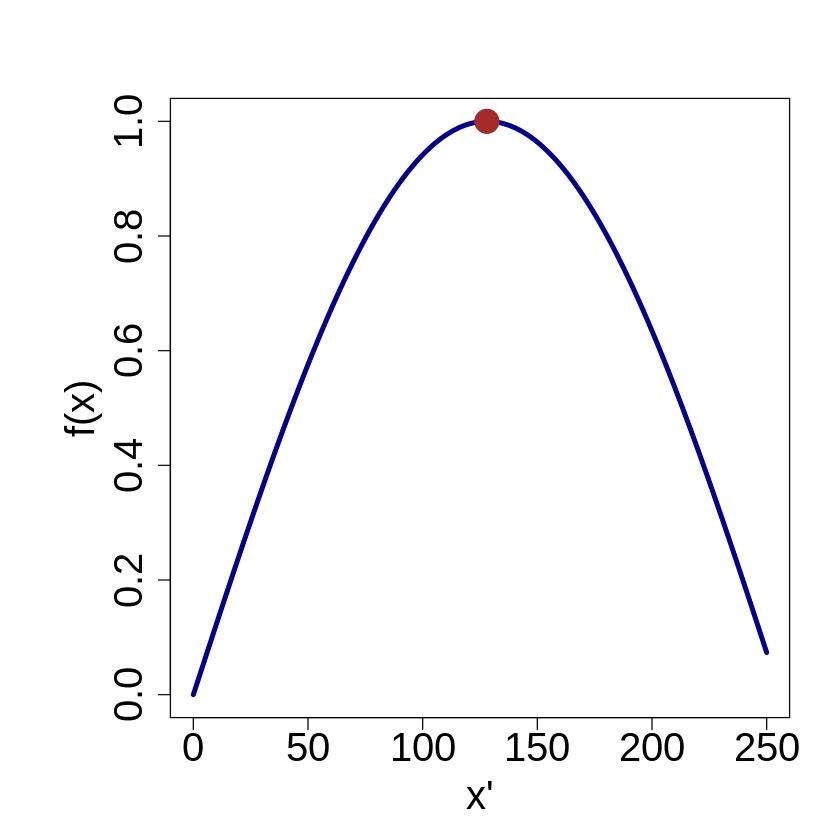

In [164]:
#@title graficar función objetivo
x = seq(0,250,1)
func = objetivo_grafica(x, bits)
par(mar = c(5,7,4,2) + 0.1)
plot(x,func, type = "l", lwd = 4, col = "darkblue", cex.lab = 2, cex.axis = 2, xlab = "x'", ylab = "f(x)")
points(128,1,col = "brown", cex = 4, pch = 20)

Figura 1. Gráfica de la función a optimizar del ejemplo de AGs. Se aprecia que la función es convex en el intervalo de 0 a 150. Aun así, se crea y aplica un AG para obtener el máximo de esta función para mostrar el funcionamiento de los AGs. El óptimo de la función es $x' = 128$ y $f(128) = 1$.

En la Fig. 1 se muestra la gráfica de la función (1). Pese a que esta función es sencilla y obtener su máximo no requiere el uso de AGs se emplea para explicar los conceptos relacionados con la implenentación de AGs. 

### Codificación 

La codificación de las soluciones se refiere a la forma en la que las soluciones en la población son representadas. Existen dos principales tipos de representaciones en un AG. La condificación como números binarios y la codificación como números reales. La codificación binaria fue presentada con la version original de los AGs. La codificación real puede ser necesaria si el problema que se está resolviendo requiere el uso de variables de tipo real. En este último caso es posible programar un algoritmo genético que trabaje completamente con variables reales o emplear una función que permita transformar variables de tipo binario a variables de tipo real.  

Para el ejemplo que se analiza en esta sección se requieren variables enteras para realizar la optimización ya que el óptimo de (1) es $x = (1,0,0,0,0,0,0,0)$, que en su forma entera equivale a $x' = 128$. Por esta razón es necesaria función (2) que permite convertir un número binario en un número entero. 

In [18]:
#@title función para transformar binario en entero
binario_a_entero = function(binario) {

    index = (length(binario)-1):0

    entero = sum(2^{index}*binario)

    return(entero)
}

In [175]:
binario_a_entero(rep(1,bits))

[1] 255

Una vez que se cuenta con esta función es posible crear una población de individuos representados como números binarios y luego transformarlos para obtener su valor equivalente como números enteros.
Por ejemplo el número binario $x = 01000100$ se transforma a su forma entera para dar 68. En el ejemplo se usan 8 bits para representar cada número binario ya que este número de bits permite representar un valor máximo 255, con lo que se cubre todo el espacio de búsqueda de 0 a 250. 

Tabla 1. Representación como número binario y como número entero de posibles soluciones del problema de optimización del ejemplo 

| número binario | número entero | fitness |
|:---:|:---:|:---:|
| 01000100 | 68 | 0.7409511 |
| 01101101 | 109 | 0.97294 |
| 11101101 | 237 | 0.2310581


In [173]:
bin1 = c(0,1,0,0,0,1,0,0)
sol1 = binario_a_entero(bin1)
print(sol1)
bin2 = c(0,1,1,0,1,1,0,1)
sol2 = binario_a_entero(bin2)
print(sol2)
bin3 = c(1,1,1,0,1,1,0,1)
sol3 = binario_a_entero(bin3)
print(sol3)

[1] 68
[1] 109
[1] 237


In [35]:
# función objetivo
objetivo = function(binario) {

    bits = length(binario)

    entero = binario_a_entero(binario) 

    f = sin(pi*(as.numeric(entero))/(2^bits))

    return(f)

}

In [174]:
fit1 = objetivo(bin1)
print(fit1)
fit1 = objetivo(bin2)
print(fit1)
fit1 = objetivo(bin3)
print(fit1)

[1] 0.7409511
[1] 0.97294
[1] 0.2310581


In [176]:
#@title función para crear individuo 
crear_individuo = function(bits, pool) {

    individuo = sample(pool, bits, replace = TRUE)

    return(individuo)
}

In [26]:
pool = c(0,1)
ind = crear_individuo(bits, pool)
ind

[1] 1 1 1 1 1 0 1 0

In [27]:
# evaluar objetivo 
objetivo(ind)

[1] 0.07356456

In [177]:
#@title función para crear población

crear_poblacion = function(num_ind, bits, pool) {
    pop = matrix(nrow = num_ind, ncol = bits)
    for (i in 1:num_ind) {

        pop[i,] = crear_individuo(bits, pool)
    }

    return(pop)
}

In [158]:
num_ind = 4
pop = crear_poblacion(num_ind, bits, pool)
pop

1,0,1,1,0,1,1,0
1,1,1,1,0,1,1,1
0,1,1,0,0,0,0,1
0,0,0,0,1,0,0,1


### Función fitness 

La función fitness es una función que mide que tan buena es una solución. Debe ser establecida de tal forma que una mejor solución tendrá un mayor fitness que peores soluciones.  La función fitness juega un papel fundamental en el proceso de selección. Si se busca maximizar la función objetivo, en algunos casos es posible establecer la función objetivo directamente como la función fitness. Si el problema de optimización busca minimizar la función objetivo, la función fitness tiene que ser planteada de tal forma que el mínimo de la función objetivo corresponda al máximo de la función fitness. Por ejemplo, si se quiere minimizar la función $f(x)$ la función fitness puede ser escrita de la siguiente manera.

$$
\text{fitness}(x) = \frac{1}{1 + f(x)} \tag{5}
$$

De esta manera, el valor $x^{opt}$ que genera el valor máximo de $\text{fitness(x)}$ da lugar al valor mínimo de $f(x)$. El aspecto importante que hay que recrodar es que la mejor solución en el AG tiene que tener el mayor valor de la función fitness. 

In [159]:
# evaluar objetivo 
apply(pop, 1, objetivo)

[1] 0.7883464 0.1102222 0.9285061 0.1102222

In [178]:
obtener_fitness = function(pop) {
    # en este caso la función fitness es igual a la función objetivo 
    fitness = apply(pop, 1, objetivo)

    return(fitness)
}

In [179]:
fitness = obtener_fitness(pop)
fitness

[1] 0.7883464 0.1102222 0.9285061 0.1102222

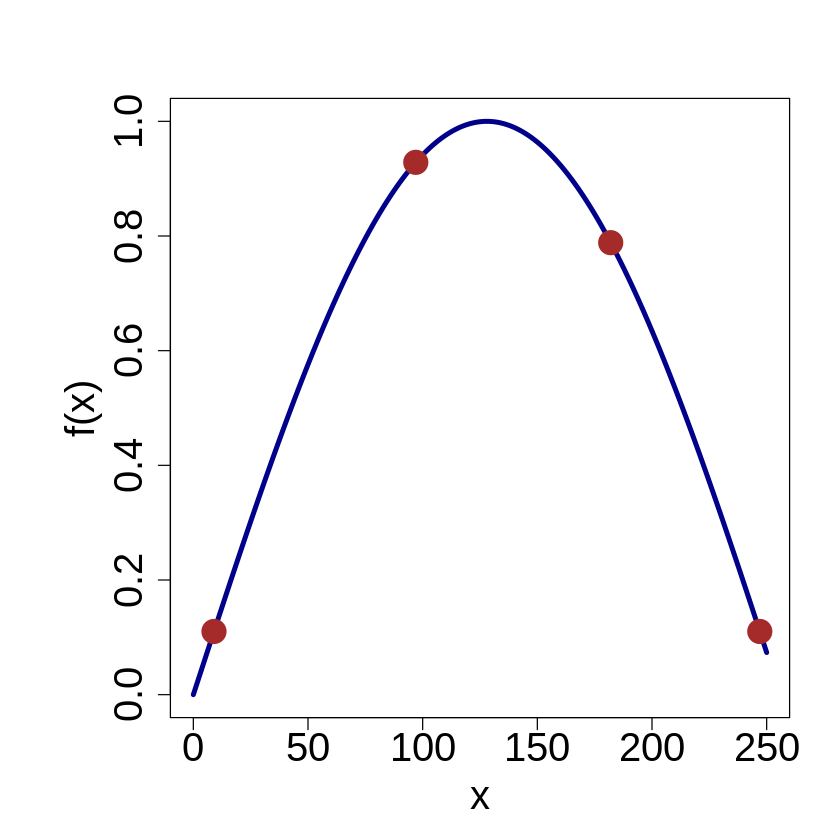

In [162]:
x = seq(0,250,1)
func = objetivo_grafica(x, bits)
par(mar = c(5,7,4,2) + 0.1)
plot(x,func, type = "l", lwd = 4, col = "darkblue", cex.lab = 2, cex.axis = 2, xlab = "x", ylab = "f(x)")
points(apply(pop,1,binario_a_entero), fitness, col = "brown", cex = 4, pch = 20)

### Selección 

La selección es el primer operador aplicado a la población para seleccionar los individuos con valores de fitness altos y formar la población de padres. El operador de selección se usa para escoger individuos por arriba del promedio de la población actual e insertar sus múltiples copias en la población de padres basado en un procedimiento probabilístico (2019--modern). 

#### Selección proporcional 

La selección original con técnica de reemplazo para los GA se denominó selección proporcional al fitness, a veces conocida como selección de ruleta. En este algoritmo, seleccionamos a los individuos en proporción a su fitness: si un individuo tiene un fitness más alto, se selecciona con más frecuencia. En un operador de reproducción comúnmente usado, una cadena se selecciona población de padres con una probabilidad proporcional a su fitness (2014--esentials). Por lo tanto, si $\text{fitness}_i$ denota el fitness del individuo $i$ en la población de tamaño $n$, la probabilidad de seleccionar al individuo $i$ para la población de padres está dada por.

$$
p_i = \frac{\text{fitness}_i}{\sum_{j=1}^n\text{fitness}_j} \tag{6}
$$

donde $p_i$ es la probabilidad de seleccionar al individuo $i$.

Nota que (6) implica que la suma de las probabilidades de los individuos es 1. La implementación del proceso de selección dado por (6) se puede entender si se imagina una ruleta rusa con su circunferencia dividida en segmentos, uno para cada individuo de la población, con las longitudes de los segmentos proporcionales al fitness de los individuos.  Si se gira la ruleta rusa $n$ veces ($n$ siendo el tamaño de la población) y seleccionando, cada vez, la cadena elegida por el apuntador de la ruleta rusa, obtenemos una población de padres de tamaño $n$. 

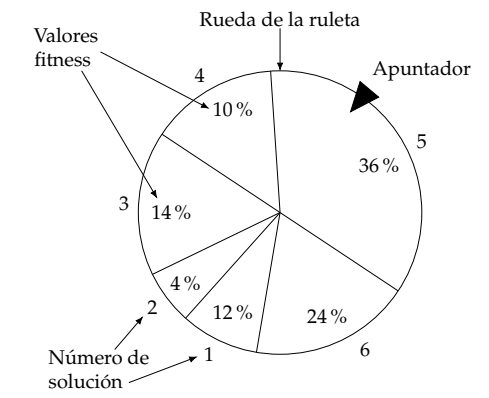

Figura 2. Esquema de selección proporcional. Cada individuo en la población tiene un espacio en la ruleta que es proporcional a su fitness. Por lo tanto, los individuos con un valor fitness alto tienen mayor probabilidad de ser seleccionados.  

In [38]:
seleccion_proporcional = function(pop, fitness) {
    # matriz para guardar los padres
    padres = matrix(nrow = nrow(pop), ncol = ncol(pop))
    # calcular probabilidad
    prob = fitness/sum(fitness)

    # calcular probabilidad acumulada 
    prob_acum = prob
    for (i in 2:nrow(pop)) {

        prob_acum[i] = prob_acum[i] + prob_acum[i-1]
    }

    for (i in 1:nrow(pop)) {

        rand = runif(1,0,1)

        min = 0

        for (j in 1:length(prob_acum)) {

            if (rand > min & rand < prob_acum[j]) {

                padres[i,] = pop[j,]
                break
            }

            min = prob_acum[j]
        }
    }

    return(padres)

} 

In [39]:
seleccion_proporcional(pop, fitness)

1,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0
1,0,1,1,1,1,1,0
0,1,0,0,1,0,1,1
1,1,1,1,1,0,1,0
0,1,0,0,1,0,1,1
1,1,0,0,0,1,0,0
1,0,1,1,0,0,1,0
1,1,0,0,0,1,0,0
1,1,0,0,0,1,0,0


In [56]:
selection_torneo = function(pop, muestra) {

    padres = matrix(nrow = nrow(pop), ncol = ncol(pop))

    for (i in 1:nrow(pop)) {

        indices = sample(1:nrow(pop), muestra, replace = F)

        individuos = pop[indices, ]

        fitness = apply(individuos, 1, objetivo)

        ganador = which.max(fitness)

        padres[i,] = individuos[ganador,]

    }

    return(padres)

}

In [43]:
muestra = 2
selection_torneo(pop, muestra)

1,1,0,0,0,1,0,0
1,1,0,0,0,1,0,0
1,0,1,0,0,1,0,0
1,0,1,1,0,0,1,0
1,0,1,1,0,0,1,0
1,0,1,1,1,1,1,0
1,0,1,0,0,1,0,0
1,0,1,0,0,1,0,0
1,0,1,1,1,1,1,0
1,0,1,1,0,0,1,0


In [57]:
cruzamiento_un_punto = function(pop, pc) {

    hijos = matrix(nrow = nrow(pop), ncol = ncol(pop))

    for (i in 1:(nrow(pop)/2)) {

        p1 = pop[2*i-1, ]
        p2 = pop[2*i, ]

        rand = runif(1,0,1)

        if (rand < pc) {

            cp = sample(2:(ncol(pop)-1), 1)

            p11 = p1[1:cp]
            p12 = p1[(cp+1):ncol(pop)]   
            p21 = p2[1:cp]
            p22 = p2[(cp+1):ncol(pop)]

            c1 = c(p11,p22)
            c2 = c(p21,p12)

            hijos[2*i-1, ] = c1
            hijos[2*i, ] = c2
        }

        else {

            hijos[2*i-1, ] = p1
            hijos[2*i, ] = p2
        }

        
    }

    return(hijos)
}

In [58]:
pc = 0.8
cruzamiento_un_punto(pop, pc)

0,0,1,1,1,0,0,0
1,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0
1,1,0,1,1,0,0,1
1,1,0,0,0,0,0,1
0,0,0,1,0,0,0,1
1,1,1,1,1,0,1,0
1,0,1,1,0,0,1,0
1,0,1,1,1,1,1,0
0,1,0,0,1,0,1,1


In [59]:
cruzamiento_uniforme = function(pop, pc) {

    hijos = matrix(nrow = nrow(pop), ncol = ncol(pop))

    for (i in 1:(nrow(pop)/2)) {

        p1 = pop[2*i-1, ]
        p2 = pop[2*i, ]

        c1 = integer(length = ncol(pop))
        c2 = integer(length = ncol(pop))

        for (j in 1:ncol(pop)) {

            rand = runif(1,0,1)

            if (rand > 0.5) {

                c1[j] = p1[j]
                c2[j] = p2[j]

            }

            else {

                c1[j] = p2[j]
                c2[j] = p1[j]
            }
        }

        hijos[2*i-1, ] = c1
        hijos[2*i, ] = c2
        
    }

    return(hijos)
}

In [60]:
cruzamiento_uniforme(pop, pc)

0,0,1,1,0,0,0,0
1,0,1,0,1,1,0,0
1,1,0,1,1,0,0,0
1,1,0,0,0,1,0,1
0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,1
1,1,1,1,0,0,1,0
1,0,1,1,1,0,1,0
0,0,1,0,1,1,1,1
1,1,0,1,1,0,1,0


In [61]:
pop

0,0,1,1,1,0,0,0
1,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0
1,1,0,1,1,0,0,1
1,1,0,1,0,0,0,1
0,0,0,0,0,0,0,1
1,1,1,1,1,0,1,0
1,0,1,1,0,0,1,0
1,0,1,1,1,1,1,0
0,1,0,0,1,0,1,1


In [62]:
mutacion_un_punto = function(pop, pm) {

    hijos = matrix(nrow = nrow(pop), ncol = ncol(pop))

    for (i in 1:nrow(pop)) {

        hijo = pop[i, ]

        rand = runif(1,0,1)
        if (rand < pm) {
            mut = sample(1:ncol(pop),1)
            bit = pop[mut]
            hijo[mut] = ifelse(bit == 0, 1, 0)
            hijos[i, ] = hijo 
        }
        else {
            hijos[i, ] = hijo
        }
    }

    return(hijos) 
}

In [63]:
pm = 0.5
mutacion_un_punto(pop,pm)

0,0,1,1,0,0,0,0
1,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0
1,1,0,1,1,1,0,1
1,1,0,1,0,0,0,1
0,0,0,0,0,0,0,1
1,1,1,1,1,0,1,0
1,0,1,1,0,0,1,0
1,0,1,1,1,1,1,0
0,0,0,0,1,0,1,1


In [64]:
pop

0,0,1,1,1,0,0,0
1,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0
1,1,0,1,1,0,0,1
1,1,0,1,0,0,0,1
0,0,0,0,0,0,0,1
1,1,1,1,1,0,1,0
1,0,1,1,0,0,1,0
1,0,1,1,1,1,1,0
0,1,0,0,1,0,1,1


In [65]:
mutacion_uniforme = function(pop, pm) {

    hijos = matrix(nrow = nrow(pop), ncol = ncol(pop))

    for (i in 1:nrow(pop)) {

        for (j in 1:ncol(pop)) {

            rand = runif(1,0,1)
            if (rand < pm) {

                bit = pop[i,j]
                hijos[i,j] = ifelse(bit == 0, 1, 0)
            }
            else {
                
                hijos[i,j] = pop[i,j]
            }
        }
    }
    return(hijos)
}

In [66]:
mutacion_uniforme(pop, pm)

1,0,0,0,1,0,0,0
1,1,1,0,1,1,1,1
1,0,0,0,1,1,0,1
1,1,1,1,0,1,0,0
0,1,0,1,0,1,1,0
1,1,1,1,1,1,1,1
1,0,1,1,0,1,0,0
0,0,1,1,1,1,1,0
1,1,1,1,1,1,0,1
1,1,0,1,1,1,1,0


In [81]:
algoritmo_genetico = function(num_ind, generaciones, bits, pc, pm) {

    # crear nueva población
    pop = crear_poblacion(num_ind, bits, pool)

    # obtener fitness 
    fitness = obtener_fitness(pop)

    # guardar registro de mejor solución actual 
    mejor_ind = numeric(length = generaciones)
    indice = which.max(fitness)
    mejor_ind[1] = binario_a_entero(pop[indice, ])
    mejor_fitness = numeric(length = generaciones)
    mejor_fitness[1] = fitness[indice]

    # operadores genéticos
    for (i in 2:generaciones) {

        # seleccionar los padres que se cruzarán 
        padres = seleccion_proporcional(pop, fitness)

        # cruzar padres para generar hijos
        hijos = cruzamiento_un_punto(padres, pc)

        # mutar hijos
        hijos = mutacion_un_punto(hijos, pm)

        # actualizar población
        pop = hijos

        # obtener fitness 
        fitness = obtener_fitness(pop)

        # guardar registro de mejor solución actual 
        indice = which.max(fitness)
        mejor_ind[i] = binario_a_entero(pop[indice, ])
        mejor_fitness[i] = fitness[indice]

    }

    return(list(mejor_ind = mejor_ind, mejor_fitness = mejor_fitness))
}

In [140]:
num_ind = 10
generaciones = 30
bits = bits
pc = 0.5
pm = 0.2
sol = algoritmo_genetico(num_ind, generaciones, bits, pc, pm)

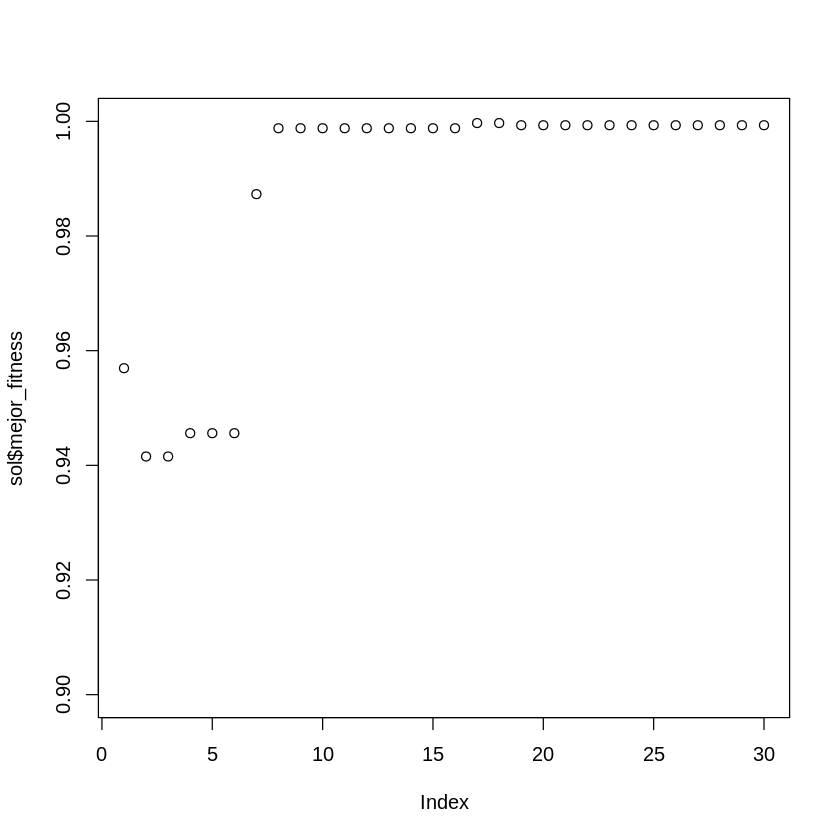

In [141]:
plot(sol$mejor_fitness, ylim = c(0.90,1))

In [102]:
sol$mejor_fitness

[1] 0.9831055 0.9831055